# Bank Customer Churn Analysis


In [2]:
#importing libraries

In [3]:
import pandas as pd
import seaborn as sns

In [4]:
#getting information about data and cleaning procedure

## Data Cleaning

In [5]:
data=pd.read_csv(r'C:\Users\MIDHILA ELIZABATH\Downloads\Churn_Modelling.csv')

In [6]:
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
data.shape

(10000, 14)

In [8]:
data.tail(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
# dropping irrelevant features
data= data.drop(['RowNumber', 'CustomerId', 'Surname'] , axis=1)
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [12]:
#encoding categorical data
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [13]:
data= pd.get_dummies(data, drop_first=True)

In [14]:
data.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [15]:
#not handling imbalanced
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

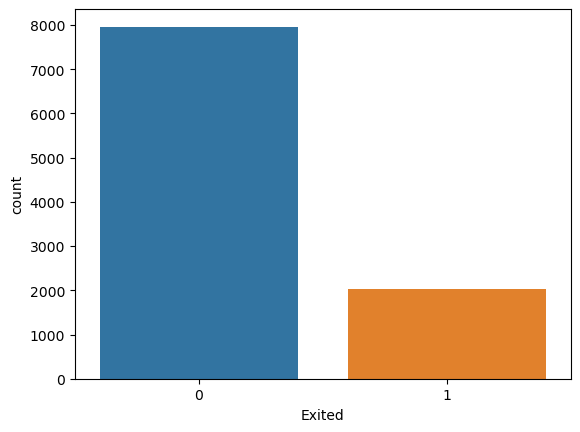

In [16]:
sns.countplot(data=data,x='Exited')

In [17]:
#since the data is imbalance we will split the independant and dependant variable
X = data.drop('Exited', axis=1)
y = data['Exited']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

## Creating training and test set

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2151,753,57,7,0.00,1,1,0,159475.08,0,0,1
8392,739,32,3,102128.27,1,1,0,63981.37,1,0,1
5006,755,37,0,113865.23,2,1,1,117396.25,1,0,0
4117,561,37,5,0.00,2,1,0,83093.25,0,0,1
7182,692,49,6,110540.43,2,0,1,107472.99,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4555,688,35,6,0.00,1,1,0,25488.43,0,1,0
4644,712,74,5,0.00,2,0,0,151425.82,0,1,1
8942,667,37,9,71786.90,2,1,1,67734.79,0,0,0
2935,687,35,8,100988.39,2,1,0,22247.27,0,1,1


### Feature scaling

In [20]:
#feature scaling

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
sc= StandardScaler()

In [23]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [24]:
X_train

array([[ 1.058568  ,  1.71508648,  0.68472287, ..., -0.57831252,
        -0.57773517,  0.90750738],
       [ 0.91362605, -0.65993547, -0.6962018 , ...,  1.72916886,
        -0.57773517,  0.90750738],
       [ 1.07927399, -0.18493108, -1.73189531, ...,  1.72916886,
        -0.57773517, -1.10191942],
       ...,
       [ 0.16821031, -0.18493108,  1.3751852 , ..., -0.57831252,
        -0.57773517, -1.10191942],
       [ 0.37527024, -0.37493284,  1.02995403, ..., -0.57831252,
         1.73089688,  0.90750738],
       [ 1.56586482,  1.14508121,  0.68472287, ..., -0.57831252,
         1.73089688,  0.90750738]])

### Logistic Regression

In [25]:
#Logistic regression

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
log=LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [28]:
y_pred1=log.predict(X_test)

In [29]:
#to check accuracy of this logistic regression
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

0.808

In [30]:
#since it is not a good practice to use accuracy on unbalanced dataset
from sklearn.metrics import precision_score,recall_score,f1_score
precision_score(y_test,y_pred1)       #TP/(TP+ FP)

0.5891472868217055

In [31]:
recall_score(y_test,y_pred1)     #TP/(TP+FN)

0.18673218673218672

In [32]:
f1_score(y_test,y_pred1)        #TP/(FN+FP)

0.2835820895522388

### Handling imbalance data with SMOTE

In [33]:
# since accuracy score is low we have to handle imbalanced dataset
#handling imbalanced data with SMOTE
from imblearn.over_sampling import SMOTE

In [34]:
X_res,y_res= SMOTE().fit_resample(X,y)

In [35]:
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [36]:
#since both the data sets have same sample size,let's train the model once again
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20, random_state=42)
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
13555,570,70,7,115197.981799,1,0,1,66616.184781,0,0,0
1665,749,42,1,129776.720000,2,0,1,143538.510000,0,0,1
14878,597,62,5,0.000000,1,1,0,49772.737947,0,0,0
7471,658,55,8,119327.930000,1,0,1,119439.660000,1,0,0
2582,656,46,5,113402.140000,2,1,1,138849.060000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
13418,380,39,0,110265.862374,1,0,0,122642.143739,1,0,0
5390,735,38,1,0.000000,3,0,0,92220.120000,0,0,0
860,667,43,8,190227.460000,1,1,0,97508.040000,0,0,1
15795,646,38,5,124952.611254,1,1,0,133691.406269,0,0,0


### Linear regression after balancing the data

log=LogisticRegression()
log.fit(X_train,y_train)
y_pred1=log.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)


In [37]:
from sklearn.metrics import precision_score,recall_score,f1_score
precision_score(y_test,y_pred1)       #TP/(TP+ FP)


ValueError: Found input variables with inconsistent numbers of samples: [3186, 2000]

In [ ]:
recall_score(y_test,y_pred1)  

In [ ]:
f1_score(y_test,y_pred1) 

### SVC

In [38]:
from sklearn import svm
svm=svm.SVC()
svm.fit(X_train,y_train)

SVC()

In [39]:
y_pred2=svm.predict(X_test)
accuracy_score(y_test,y_pred2)


0.566541117388575

In [40]:
precision_score(y_test, y_pred2)

0.5399257195914577

### KNeighbors Classifier

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred3=knn.predict(X_test)

In [42]:
accuracy_score(y_test,y_pred3)

0.664783427495292

In [43]:
precision_score(y_test, y_pred3)

0.631010264721772

### Decision Tree Classifier

In [44]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [45]:
y_pred4= dt.predict(X_test)

In [46]:
accuracy_score(y_test,y_pred4)

0.7909604519774012

In [47]:
precision_score(y_test,y_pred4)

0.7689508793208005

### Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred5= rf.predict(X_test)

In [49]:
accuracy_score(y_test,y_pred5)

0.8549905838041432

In [50]:
precision_score(y_test,y_pred5)

0.8437303087586642

### Gradient Boosting Classifier

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_pred6= gbc.predict(X_test)

In [52]:
accuracy_score(y_test,y_pred6)

0.8452605147520402

In [53]:
precision_score(y_test,y_pred6)

0.8410553410553411

## Visualization of comparision between prediction models

In [54]:
final_data=pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],'ACC':[accuracy_score(y_test,y_pred1),
                                                                            accuracy_score(y_test,y_pred2),
                                                                            accuracy_score(y_test,y_pred3),
                                                                           accuracy_score(y_test,y_pred4),
                                                                           accuracy_score(y_test,y_pred5),
                                                                           accuracy_score(y_test,y_pred6)]})

ValueError: Found input variables with inconsistent numbers of samples: [3186, 2000]

In [ ]:
final_data

In [ ]:
import seaborn as sns
sns.barplot(final_data,x='Models',y='ACC')

In [ ]:
#saving the best model
X_res=sc.fit_transform(X_res)
rf.fit(X_res,y_res)

In [56]:
import joblib
joblib.dump(rf,"Churn_Model")

['Churn_Model']

In [57]:
model=joblib.load("Churn_model")

In [62]:
data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [65]:
#sample data
model.predict([[619,42,2,0.0,0,0,0,10123.00,0,0,0]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)